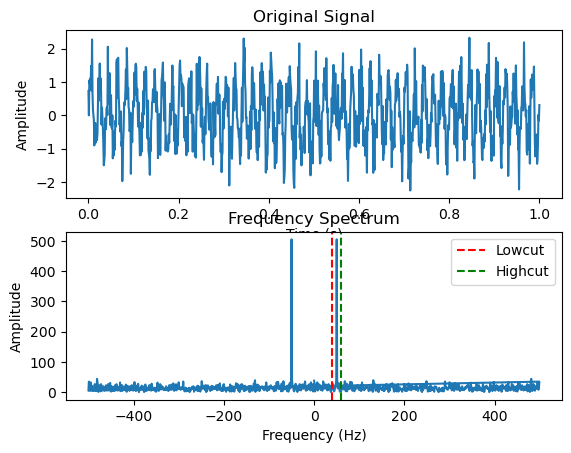

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_specific_frequency_band(signal, fs, lowcut, highcut):
    # Perform Fourier Transform
    n = len(signal)
    freq_values = np.fft.fftfreq(n, d=1/fs)
    fft_values = np.fft.fft(signal)

    # Plot the original signal
    plt.subplot(2, 1, 1)
    plt.plot(np.linspace(0, n/fs, n), signal)
    plt.title('Original Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    # Plot the frequency spectrum
    plt.subplot(2, 1, 2)
    plt.plot(freq_values, np.abs(fft_values))
    plt.title('Frequency Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')

    # Highlight the specific frequency band
    plt.axvline(x=lowcut, color='r', linestyle='--', label='Lowcut')
    plt.axvline(x=highcut, color='g', linestyle='--', label='Highcut')

    plt.legend()
    plt.show()

# Example usage
fs = 1000.0  # Sampling frequency
t = np.linspace(0, 1, int(fs))
frequency_of_interest = 50.0  # Frequency to highlight in the plot

# Create a signal with the specified frequency
signal = np.sin(2 * np.pi * frequency_of_interest * t) + 0.5 * np.random.randn(len(t))

# Set the frequency band of interest
lowcut = frequency_of_interest - 10.0
highcut = frequency_of_interest + 10.0

# Plot the signal and highlight the specific frequency band
plot_specific_frequency_band(signal, fs, lowcut, highcut)


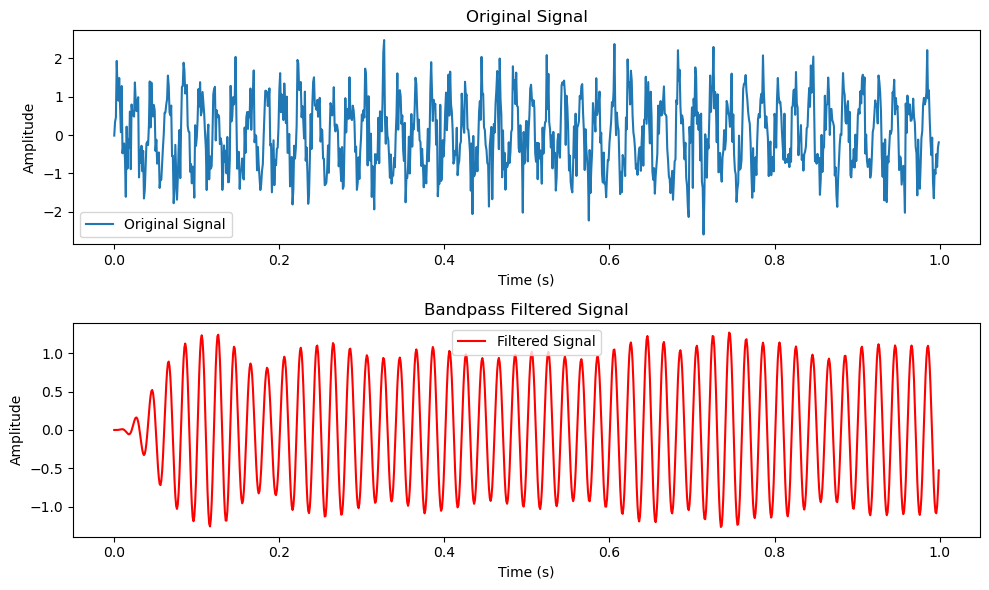

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Example usage
fs = 1000.0  # Sampling frequency
t = np.linspace(0, 1, int(fs), endpoint=False)  # Time vector
frequency_of_interest = 50.0  # Frequency to highlight in the plot

# Create a signal with the specified frequency
signal = np.sin(2 * np.pi * frequency_of_interest * t) + 0.5 * np.random.randn(len(t))

# Set the bandpass filter parameters
lowcut = 40.0  # Lower cutoff frequency
highcut = 60.0  # Upper cutoff frequency
order = 4  # Filter order

# Apply the bandpass filter
filtered_signal = butter_bandpass_filter(signal, lowcut, highcut, fs, order)

# Plot the original signal and the filtered signal
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal, label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal, label='Filtered Signal', color='r')
plt.title('Bandpass Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()


In [4]:
import scipy.io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
BOr_W = scipy.io.loadmat('BOr_W.mat')

In [10]:
type(BOr_W["AW"])

numpy.ndarray

In [31]:
t = np.arange(0,10000)
t

array([   0,    1,    2, ..., 9997, 9998, 9999])

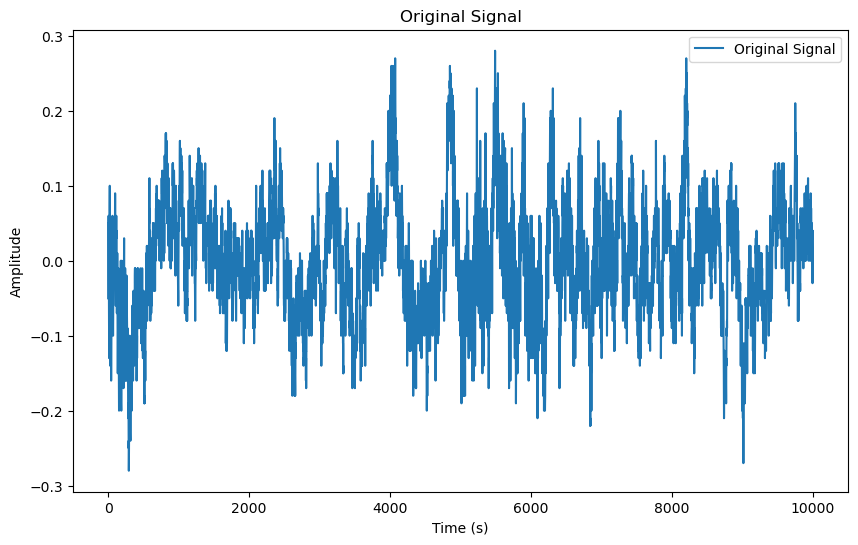

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal[:10000], label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

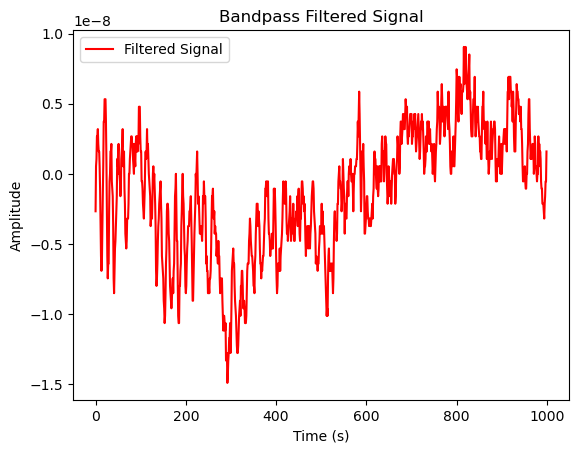

In [35]:
fs = 1024  # Sampling frequency
t = np.arange(0, 1000) # Time vector
frequency_of_interest = 50.0  # Frequency to highlight in the plot

# Create a signal with the specified frequency
signal = BOr_W['AW']
# Set the bandpass filter parameters
lowcut = 8 # Lower cutoff frequency
highcut = 13  # Upper cutoff frequency
order = 4  # Filter order

# Apply the bandpass filter
filtered_signal = butter_bandpass_filter(signal, lowcut, highcut, fs, order)

plt.plot(t, filtered_signal[:1000], label='Filtered Signal', color='r')
plt.title('Bandpass Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

ValueError: x and y must have same first dimension, but have shapes (1024,) and (583680, 1)

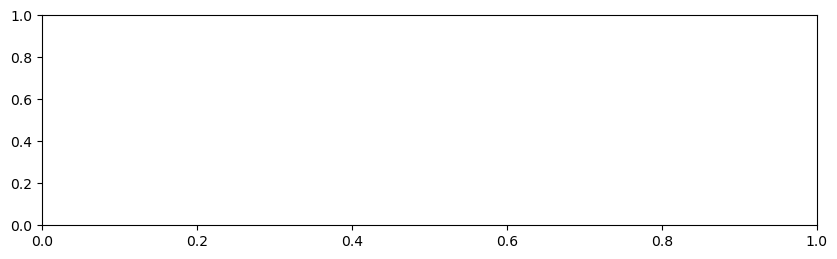

In [8]:
fs = 1024  # Sampling frequency
t = np.linspace(0, len(BOr_W["AW"]), int(fs), endpoint=False)  # Time vector
frequency_of_interest = 50.0  # Frequency to highlight in the plot

# Create a signal with the specified frequency
signal = BOr_W['AW']
# Set the bandpass filter parameters
lowcut = 0.4 # Lower cutoff frequency
highcut = 7  # Upper cutoff frequency
order = 4  # Filter order

# Apply the bandpass filter
filtered_signal = butter_bandpass_filter(signal, lowcut, highcut, fs, order)

# Plot the original signal and the filtered signal
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal, label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal, label='Filtered Signal', color='r')
plt.title('Bandpass Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()
